In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
df.shape

(149, 20)

In [4]:
df.drop(['Country name','Regional indicator'], axis =1, inplace = True)

In [5]:
df

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [6]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Ladder score                                149 non-null    float64
 1   Standard error of ladder score              149 non-null    float64
 2   upperwhisker                                149 non-null    float64
 3   lowerwhisker                                149 non-null    float64
 4   Logged GDP per capita                       149 non-null    float64
 5   Social support                              149 non-null    float64
 6   Healthy life expectancy                     149 non-null    float64
 7   Freedom to make life choices                149 non-null    float64
 8   Generosity                                  149 non-null    float64
 9   Perceptions of corruption                   149 non-null    float64
 10  Ladder score i

In [8]:
df.isnull().sum()

Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [9]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

<AxesSubplot:>

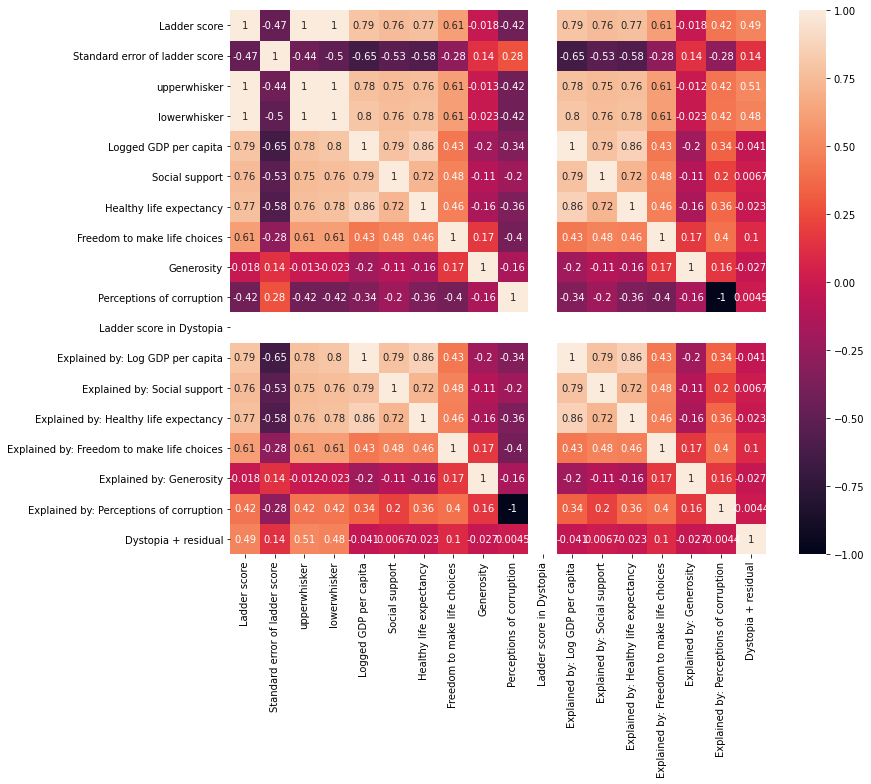

In [10]:
plt.figure(figsize= (12,10))
sns.heatmap(df.corr(), annot = True, vmin=-1.0,vmax = 1.0)

In [11]:
df.drop(['Standard error of ladder score', 'Perceptions of corruption'], inplace = True, axis = 1)

In [12]:
X = df.drop(['Ladder score'], axis = True)
y = df['Ladder score']

In [13]:
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1.000000,1.000000,0.826018,0.944231,0.826058,0.964286,0.228916,0.0,0.825814,0.943686,0.826087,0.965084,0.229205,0.879342,0.919195
1,0.959118,0.957231,0.857542,0.944231,0.850641,0.959184,0.383133,0.0,0.857796,0.945392,0.850613,0.958101,0.384473,0.886654,0.783345
2,0.950829,0.947477,0.894254,0.921154,0.910342,0.913265,0.377108,0.0,0.894346,0.920648,0.909699,0.912011,0.377079,0.755027,0.773112
3,0.955916,0.935847,0.846568,1.000000,0.861176,0.974490,0.539759,0.0,0.846374,1.000000,0.860647,0.974860,0.541590,0.310786,0.818278
4,0.927280,0.930595,0.857342,0.921154,0.840105,0.903061,0.557831,0.0,0.857224,0.920648,0.839465,0.903631,0.558226,0.702011,0.758645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.217031,0.155130,0.257582,0.623077,0.007796,0.566327,0.189157,0.0,0.257567,0.623720,0.007804,0.565642,0.190388,0.027422,0.406493
145,0.191221,0.163759,0.627893,0.617308,0.378964,0.751701,0.050602,0.0,0.627641,0.617747,0.379041,0.752793,0.049908,0.160878,0.000000
146,0.179352,0.156256,0.207702,0.171154,0.453802,0.875850,0.420482,0.0,0.207881,0.172355,0.453735,0.875698,0.419593,0.901280,0.157728
147,0.124906,0.108985,0.260974,0.551923,0.271220,0.501701,0.290361,0.0,0.260994,0.553754,0.270903,0.501397,0.290203,0.137112,0.196542


<Figure size 720x576 with 0 Axes>

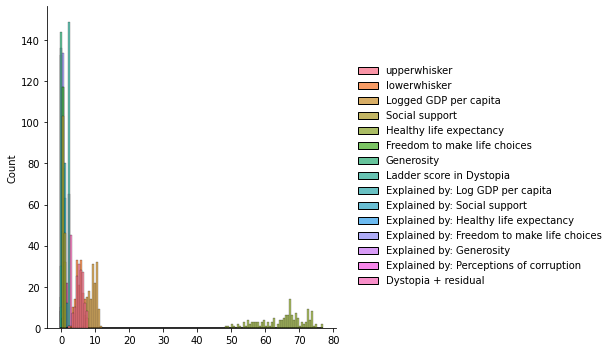

In [14]:
plt.figure(figsize = (10,8))
sns.displot(X)
plt.show()

In [15]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.7, random_state =45)

In [16]:
xtrain.shape

(44, 15)

In [17]:
ytrain.shape

(44,)

In [18]:
ytest.shape

(105,)

In [19]:
xtest.shape

(105, 15)

In [20]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [21]:
lr.predict(xtest)

array([7.84188623, 6.16613586, 4.325143  , 7.55416302, 6.32990331,
       6.15173529, 6.22338171, 4.83042662, 4.58387605, 3.77479779,
       6.46091934, 4.208507  , 4.83369132, 4.95650866, 4.27468446,
       6.31627213, 3.51208511, 3.62383841, 6.17914587, 5.26572439,
       5.30552035, 5.28270672, 4.79463875, 6.01194053, 7.46422326,
       4.85217646, 5.13168628, 5.76647789, 7.18360125, 5.14154128,
       5.47687176, 4.94742626, 3.8495779 , 5.02456292, 6.49373837,
       4.07345368, 7.10308267, 6.49096809, 5.53336815, 6.43126007,
       6.33063862, 5.3418034 , 7.61980763, 5.99193201, 5.11739955,
       6.64657726, 4.28842442, 5.83971773, 4.89150512, 6.25550838,
       6.13982204, 5.74383131, 4.35539287, 6.06041655, 3.61452355,
       6.8338362 , 6.43434793, 5.10150268, 6.0774056 , 5.17076576,
       5.54505   , 4.72124965, 5.67739845, 3.6575347 , 7.57158771,
       6.18927591, 6.17891427, 6.58454894, 5.58053185, 7.32418024,
       6.0317934 , 4.57403939, 5.38467181, 5.53570556, 5.06639

In [22]:
lr.score(xtest,ytest)

0.9999998535764928

# **Accuracy of the given model is 99.99%**